### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day
    - Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.
    - There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - \$50).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/MLAI_Haas/data/coupons.csv')

In [6]:
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2175,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,gt8,4~8,gt8,1~3,1,1,0,0,1,1
4955,Work,Alone,Sunny,80,7AM,Coffee House,2h,Male,31,Single,...,never,4~8,1~3,less1,1,0,0,1,0,0
2105,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Female,26,Single,...,1~3,gt8,4~8,1~3,1,0,0,0,1,1
3081,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,0,0,1,1
8392,No Urgent Place,Friend(s),Sunny,55,6PM,Carry out & Take away,1d,Female,50plus,Single,...,4~8,4~8,gt8,less1,1,1,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [8]:
# rename misspelled variable name
data.rename(columns = {'passanger':'passenger'}, inplace = True)

In [9]:
data.describe()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
cat_col = list(data.select_dtypes("object").columns)
# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts().reset_index())
    print("-" * 50)


       destination  count
0  No Urgent Place   6283
1             Home   3237
2             Work   3164
--------------------------------------------------
   passenger  count
0      Alone   7305
1  Friend(s)   3298
2    Partner   1075
3     Kid(s)   1006
--------------------------------------------------
  weather  count
0   Sunny  10069
1   Snowy   1405
2   Rainy   1210
--------------------------------------------------
   time  count
0   6PM   3230
1   7AM   3164
2  10AM   2275
3   2PM   2009
4  10PM   2006
--------------------------------------------------
                  coupon  count
0           Coffee House   3996
1        Restaurant(<20)   2786
2  Carry out & Take away   2393
3                    Bar   2017
4      Restaurant(20-50)   1492
--------------------------------------------------
  expiration  count
0         1d   7091
1         2h   5593
--------------------------------------------------
   gender  count
0  Female   6511
1    Male   6173
-----------------------------

In [11]:
#check for duplicates
data.duplicated().value_counts()

False    12610
True        74
Name: count, dtype: int64

In [12]:
# drop duplicate rows and check number of rows after drop
data.drop_duplicates(keep=False, inplace=True)
data.shape

(12536, 26)

In [13]:
#Convert Age feature to numeric
data['age'].replace({'below21': 20, '50plus': 50}, inplace=True)
data['age']=data['age'].astype(int)
data['age'].info()

<class 'pandas.core.series.Series'>
Index: 12536 entries, 0 to 12683
Series name: age
Non-Null Count  Dtype
--------------  -----
12536 non-null  int64
dtypes: int64(1)
memory usage: 195.9 KB


In [14]:
#check for missing values
data.isnull().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12428
Bar                       107
CoffeeHouse               217
CarryAway                 149
RestaurantLessThan20      128
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [15]:
# Drop variable with most missing values, 'car'
data.drop(columns =['car'], inplace=True)

In [16]:
#Fill missing values in other variables with 'never'
data['Bar'] = data['Bar'].fillna('never')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('never')
data['CarryAway'] = data['CarryAway'].fillna('never')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('never')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('never')
#Check missing values after changes
data.isnull().sum()


destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [17]:
# Count the Yes and No responses and calculate proportion of Yes responses

accepted_coupon=data.query('Y == 1')
percent_yes = data.value_counts('Y',normalize=True)
print("Number of drivers who were offered a coupon:", len(data))
print("Number of drivers who accepted the coupon:", len(accepted_coupon))
print("Percentage of drivers who accepted the coupon:", round(len(accepted_coupon)/len(data)*100),"%)")

Number of drivers who were offered a coupon: 12536
Number of drivers who accepted the coupon: 7104
Percentage of drivers who accepted the coupon: 57 %)


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Count')

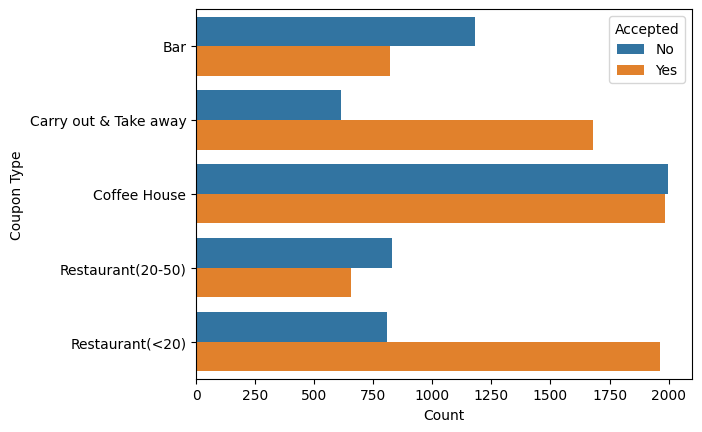

In [18]:
coupon_type = data[['coupon', 'Y']].groupby('coupon').value_counts('Y').reset_index()
coupon_type['Accepted'] = coupon_type['Y'].astype('str')
ax = sns.barplot(data=coupon_type, x='count', y='coupon', hue='Accepted', orient='h')
ax.legend(handles=ax.get_legend_handles_labels()[0], labels=['No', 'Yes'], title='Accepted')
ax.set_ylabel('Coupon Type')
ax.set_xlabel('Count')

6. Use a histogram to visualize the temperature column.

Drivers were more likely to accept coupons during warm weather


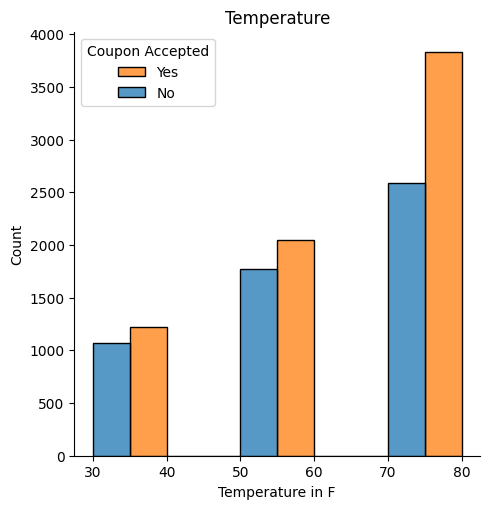

In [19]:
sns.displot(data, x="temperature", hue='Y', multiple="dodge", binwidth=10, legend=False)
plt.legend(title='Coupon Accepted', labels=['Yes', 'No'])
plt.title("Temperature")
plt.xlabel('Temperature in F')
print('Drivers were more likely to accept coupons during warm weather')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
#New dataframe containing only Bar coupons
data_bar = data[data["coupon"] == "Bar"]
data_bar.shape

(2003, 25)

2. What proportion of bar coupons were accepted?


In [21]:
# Calculate proportion of Yes responses for Bar coupons
bar_accept=data_bar.query('Y == 1')
percent_accept=len(bar_accept)/len(data_bar)
print("Number of bar coupons offered to drivers:", len(data_bar))
print("Number of drivers who accepted the bar coupon:", len(bar_accept))
print("Percentage of drivers who accepted the coupon:", round(percent_accept*100),"%)")

Number of bar coupons offered to drivers: 2003
Number of drivers who accepted the bar coupon: 821
Percentage of drivers who accepted the coupon: 41 %)


In [22]:
cat_col = list(bar_accept.select_dtypes("object").columns)
# Printing number of count of each unique value in each column
for column in cat_col:
    print(bar_accept[column].value_counts().reset_index())
    print("-" * 50)

       destination  count
0  No Urgent Place    414
1             Home    229
2             Work    178
--------------------------------------------------
   passenger  count
0      Alone    487
1  Friend(s)    186
2    Partner    105
3     Kid(s)     43
--------------------------------------------------
  weather  count
0   Sunny    591
1   Rainy    154
2   Snowy     76
--------------------------------------------------
   time  count
0   6PM    262
1  10PM    182
2   7AM    178
3  10AM    159
4   2PM     40
--------------------------------------------------
  coupon  count
0    Bar    821
--------------------------------------------------
  expiration  count
0         1d    639
1         2h    182
--------------------------------------------------
   gender  count
0    Male    467
1  Female    354
--------------------------------------------------
       maritalStatus  count
0             Single    361
1    Married partner    284
2  Unmarried partner    151
3           Divorced     1

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
#Acceptance rates of Bar coupon by frequency of bar visits
bar_freq = bar_accept.query('Bar == "4~8" or Bar == "gt8"')
percent_freq_accept=len(bar_freq)/len(data_bar)
bar_infreq = bar_accept.query('Bar == "never" or Bar == "1~3" or Bar == "less1"')
percent_infreq_accept=len(bar_infreq)/len(data_bar)
print("The coupon acceptance rate is calculated based on the total drivers offered the Bar coupon: 2003")
print("Number of drivers who accepted coupon and go to bars MORE than 3 times per month:", len(bar_freq))
print("Coupon acceptance rate:", round(percent_freq_accept*100), "%)")
print("Number of drivers who accepted coupon and go to bars LESS than 3 times per month:", len(bar_infreq))
print("Coupon acceptance rate:", round(percent_infreq_accept*100), "%)")
#print("Number of drivers who accepted coupon and go to bars LESS than 3 times per month:", len(bar_infreq))
#print("Coupon acceptance rate:", len(bar_accept)/len(bar_infreq)
#px.histogram(data_bar, x = 'Bar', color='Y')

The coupon acceptance rate is calculated based on the total drivers offered the Bar coupon: 2003
Number of drivers who accepted coupon and go to bars MORE than 3 times per month: 153
Coupon acceptance rate: 8 %)
Number of drivers who accepted coupon and go to bars LESS than 3 times per month: 668
Coupon acceptance rate: 33 %)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:
bar_1m_25plus = bar_accept.query('(Bar == "1~3" or Bar == "gt8" or Bar == "4~8") & (age > 25)')
all_others=len(data_bar)-len(bar_1m_25plus)
print("Number of drivers who accepted coupon, go to bars more than once a month, and are over 25:", len(bar_1m_25plus))
print("Coupon acceptance rate:", round(len(bar_1m_25plus) / len(data_bar) * 100), "%)")
print("Number of all other drivers who accepted coupon:", len(bar_accept)-len(bar_1m_25plus))
print("Coupon acceptance rate for all others:", round(all_others/ len(data_bar) * 100), "%)")

Number of drivers who accepted coupon, go to bars more than once a month, and are over 25: 292
Coupon acceptance rate: 15 %)
Number of all other drivers who accepted coupon: 529
Coupon acceptance rate for all others: 85 %)


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [26]:
bar_freq= ["1~3", "gt8", "4~8"]
passenger= ["Alone", "Kid\(s\)"]
occupation= ["Farming Fishing & Forestry"]

bar_1m_nokid=bar_accept.query('(Bar == @bar_freq) & (passenger != @passenger) & (occupation != @occupation)')
all_others=len(bar_accept)-len(bar_1m_nokid.shape)
print("Number of drivers who accepted coupon, go to bars 1+ times/month, had adult passengers and not in Farming:", len(bar_1m_nokid))
print("Coupon acceptance rate:", round(len(bar_1m_nokid) / len(bar_accept) * 100), "%)")

Number of drivers who accepted coupon, go to bars 1+ times/month, had adult passengers and not in Farming: 157
Coupon acceptance rate: 19 %)


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [28]:
bar_1m_nokid_nowidow=bar_accept.query('(Bar == @bar_freq) & (passenger != @passenger) & (maritalStatus != "Widowed")')
print("Number of drivers who accepted that go to bars more than once a month, had adult passengers, and were not widowed:", len(bar_1m_nokid_nowidow))
print("Coupon acceptance rate:", round(len(bar_1m_nokid_nowidow) / len(bar_accept) * 100), "%)")

Number of drivers who accepted that go to bars more than once a month, had adult passengers, and were not widowed: 157
Coupon acceptance rate: 19 %)


In [29]:
bar_1m_under30=bar_accept.query('(Bar == @bar_freq) & (age<30)')
print("Number of drivers who accepted that go to bars more than once a month, and are under 30:", len(bar_1m_under30))
print("Coupon acceptance rate:", round(len(bar_1m_under30) / len(bar_accept) * 100), "%)")

Number of drivers who accepted that go to bars more than once a month, and are under 30: 249
Coupon acceptance rate: 30 %)


In [30]:
cheap_rest=["4~8", "gt8"]
income50k=["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]
bar_rest_inc50k=bar_accept.query('(RestaurantLessThan20==@cheap_rest) & (income==@income50k)')
print("Number of drivers who accepted that go to cheap restaurants 4+ times a month and income <50k:", len(bar_rest_inc50k))
print("Coupon acceptance rate:", round(len(bar_rest_inc50k) / len(bar_accept) * 100), "%)")

Number of drivers who accepted that go to cheap restaurants 4+ times a month and income <50k: 156
Coupon acceptance rate: 19 %)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

We observe that no drivers who were in Farming occupation or were widowed went to bars more than once a month, so these filters did not affect the results.

The Bar coupon acceptance rate was much higher among certain groups of drivers:

*   those who went to bars less frequently, fewer than 3 times a month, were 4x more likely to accept the coupon
*   about 1 in 5 drivers who went to bars more than once a month and had adult passengers accepted the coupon; the rate was higher for younger drivers under 30, about 1 in 3
*   about 1 in 5 drivers who frequent cheap restaurants, more than 4 times a month, and have income less than 50K accepted the coupon

We conclude that drivers who were between 25 and 30, who prefer cheaper restaurants, and who were traveling with adult passengers were likely to accept the Bar coupon.

# **Independent Investigation**

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Exploration of dataset**

Before I investigate an individual coupon, I am curious about other potential influences on drivers accepting a coupon in general, such as time, temperature, direction of travel and closeness to the coupon destination. The following plots explore these features in the total dataset.

Younger and male drivers were more likely to accept coupons


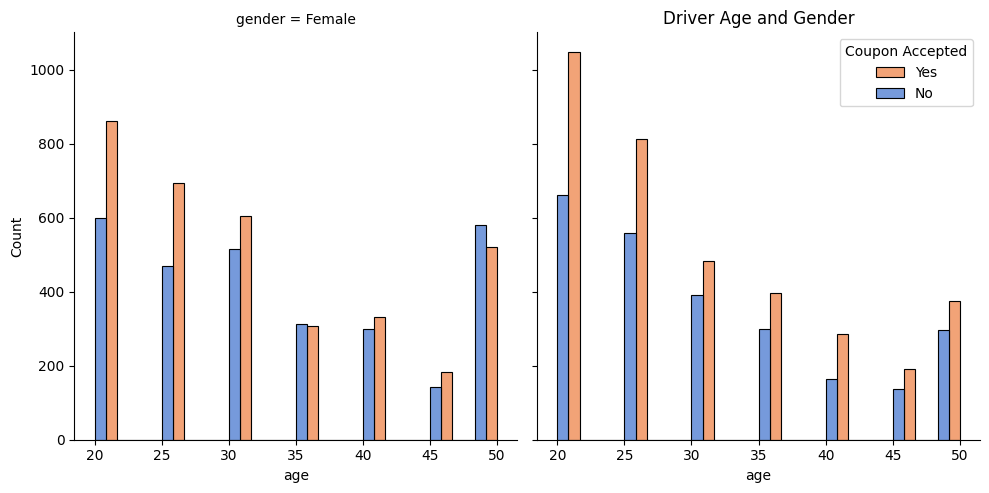

In [ ]:
g=sns.displot(data, x = 'age', hue='Y', col='gender', multiple="dodge", legend=False)
plt.legend(title='Coupon Accepted',  labels=['Yes', 'No'])
plt.title("Driver Age and Gender")
print("Drivers age 30 or under and male were more likely to accept coupons")

Drivers were more likely to accept coupons between 10am and 6pm


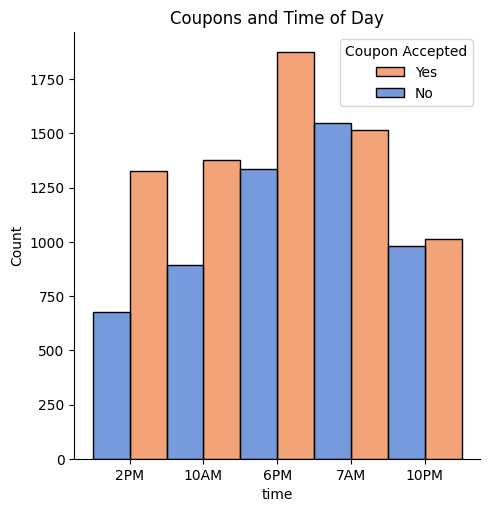

In [ ]:
sns.displot(data, x = 'time', hue='Y', multiple="dodge", legend=False)
plt.legend(title='Coupon Accepted',  labels=['Yes', 'No'])
plt.title("Coupons and Time of Day")
print("Drivers were more likely to accept coupons between 10am and 6pm")

Drivers were more likely to accept coupons when they had no urgent place to go


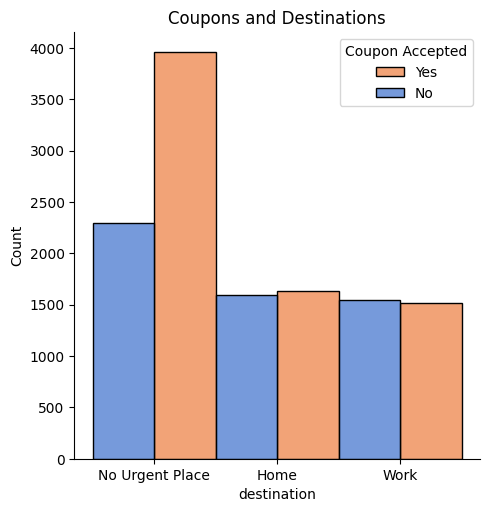

In [ ]:
sns.displot(data, x = 'destination', hue='Y', multiple="dodge", legend=False)
plt.legend(title='Coupon Accepted',  labels=['Yes', 'No'])
plt.title("Coupons and Destinations")
print("Drivers were more likely to accept coupons when they had no urgent place to go")

Drivers were more likely to accept coupons when they were single


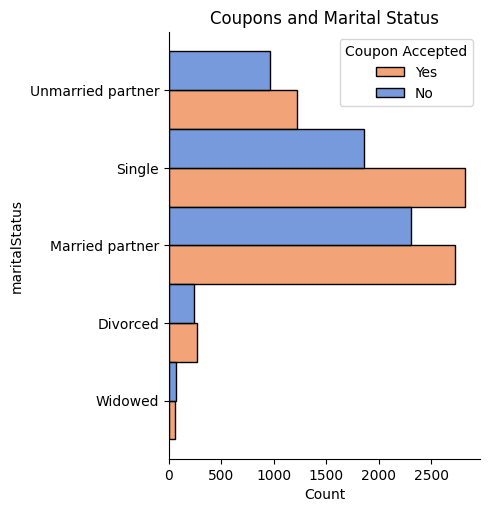

In [ ]:
sns.displot(data, y = 'maritalStatus', hue='Y', multiple="dodge", legend=False)
plt.legend(title='Coupon Accepted',  labels=['Yes', 'No'])
plt.title("Coupons and Marital Status")
print("Drivers were more likely to accept coupons when they were single")

Drivers were more likely to accept coupons when they were with friends


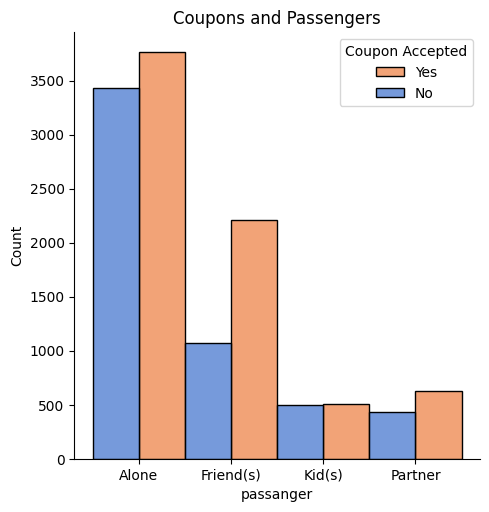

In [ ]:
sns.displot(data, x = 'passanger', hue='Y', multiple="dodge", legend=False)
plt.legend(title='Coupon Accepted',  labels=['Yes', 'No'])
plt.title("Coupons and Passengers")
print("Drivers were more likely to accept coupons when they were with friends")

No particularly stong correlation between any of the variables
Driving opposite direction and distance within 15 or 25 minutes are correlated with acceptance


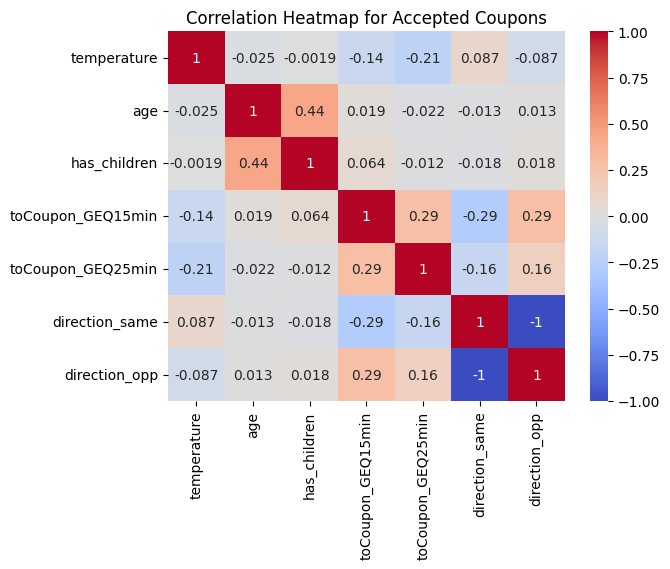

In [ ]:
sns.heatmap(accepted_coupon[['temperature', 'age', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Accepted Coupons")
print("No particularly stong correlation between any of the variables")
print("Driving opposite direction and distance within 15 or 25 minutes are correlated with acceptance")

# **Carryout & Takeaway Coupon Exploration**

I investigated the Carryout & Takeaway coupon further to identify key characteristics of customers who accepted these coupons, as well as characteristics of the coupons that were accepted, for example, whether factors like weather, time of day, distance to destination and expiration time impacted acceptance rate.

**1. What proportion of Carryout coupons were accepted?**

In [31]:
#New dataframe containing only Carryout coupons
data_carryout = data[data["coupon"] == "Carry out & Take away"]

# Calculate proportion of Yes responses for Carryout coupons
carryout_accept=data_carryout.query('Y == 1')
percent_accept=len(carryout_accept)/len(data_carryout)
print("Number of  carry out coupons offered to drivers:", len(data_carryout))
print("Number of drivers who accepted the carry out coupon:", len(carryout_accept))
print("Percentage of drivers who accepted the coupon:", round(percent_accept*100),"%)")

Number of  carry out coupons offered to drivers: 2295
Number of drivers who accepted the carry out coupon: 1680
Percentage of drivers who accepted the coupon: 73 %)


In [32]:
# Calculate proportion of Yes responses for Carryout coupons
carryout_accept=data_carryout.query('Y == 1')
percent_accept=len(carryout_accept)/len(data_carryout)
print("Number of  carry out coupons offered to drivers:", len(data_carryout))
print("Number of drivers who accepted the carry out coupon:", len(carryout_accept))
print("Percentage of drivers who accepted the coupon:", round(percent_accept*100),"%)")

Number of  carry out coupons offered to drivers: 2295
Number of drivers who accepted the carry out coupon: 1680
Percentage of drivers who accepted the coupon: 73 %)


In [50]:
data_carryout.describe()

,temperature,age,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,2295.000000,2295.000000,2295.000000,2295.0,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000
mean,57.581699,32.407407,0.434858,1.0,0.620479,0.077996,0.344662,0.655338,0.732026
std,21.511928,10.196929,0.495846,0.0,0.485373,0.268223,0.475362,0.475362,0.443000
min,30.000000,20.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,26.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,31.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,41.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000
max,80.000000,50.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


We observe the average age of drivers who accepted a Carryout coupon was 32. About 43% of them had children. The acceptance rate when the coupon destination was within 15 minutes was 62%, compared to 8% when it was 25 minutes away. The acceptance rate was 24% when the coupon destination was in the same direction, but 66% when in the opposite direction.

In [47]:
# Printing number of count of each unique value in each column prior to further analysis and plotting
cat_col = list(data_carryout.select_dtypes("object").columns)
for column in cat_col:
    print(data_carryout[column].value_counts().reset_index())
    print("-" * 50)

       destination  count
0  No Urgent Place    970
1             Work    676
2             Home    649
--------------------------------------------------
   passenger  count
0      Alone   1317
1  Friend(s)    735
2     Kid(s)    150
3    Partner     93
--------------------------------------------------
  weather  count
0   Sunny   1677
1   Rainy    315
2   Snowy    303
--------------------------------------------------
   time  count
0   7AM    676
1  10AM    513
2  10PM    457
3   6PM    431
4   2PM    218
--------------------------------------------------
                  coupon  count
0  Carry out & Take away   2295
--------------------------------------------------
  expiration  count
0         1d   1366
1         2h    929
--------------------------------------------------
   gender  count
0  Female   1182
1    Male   1113
--------------------------------------------------
       maritalStatus  count
0    Married partner    929
1             Single    856
2  Unmarried partner  

**2. What were the demographic characteristics of drivers who accepted the Carryout coupon?**

Drivers under 30 and over 45, and male, were more likely to accept coupons


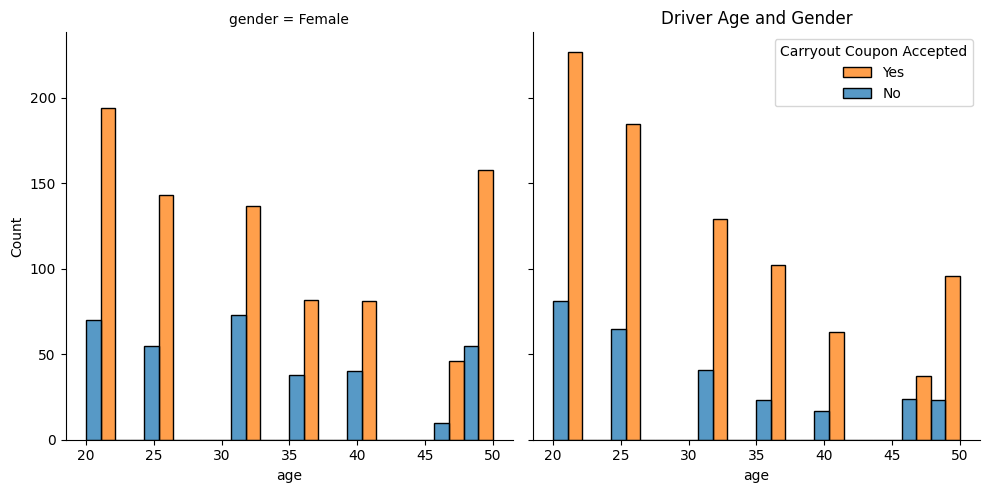

In [33]:
g=sns.displot(data_carryout, x = 'age', hue='Y', col='gender', multiple="dodge", legend=False)
plt.legend(title='Carryout Coupon Accepted',  labels=['Yes', 'No'])
plt.title("Driver Age and Gender")
print("Drivers under 30 and over 45, and male, were more likely to accept coupons")

Single and married drivers were equally likely to accept the coupon


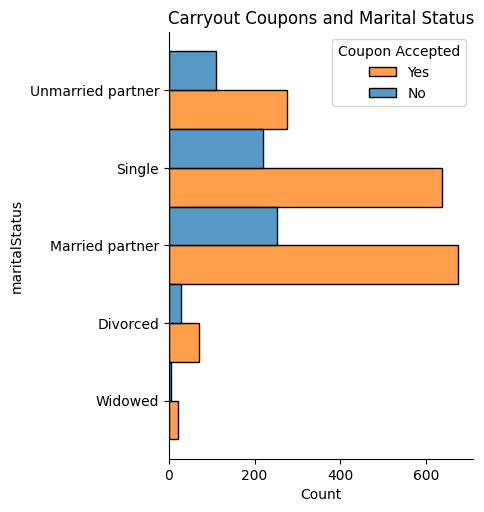

In [34]:
sns.displot(data_carryout, y = 'maritalStatus', hue='Y', multiple="dodge", legend=False)
plt.legend(title='Coupon Accepted',  labels=['Yes', 'No'])
plt.title("Carryout Coupons and Marital Status")
print("Single and married drivers were equally likely to accept the coupon")

Lower income drivers were more likely to accept the coupon


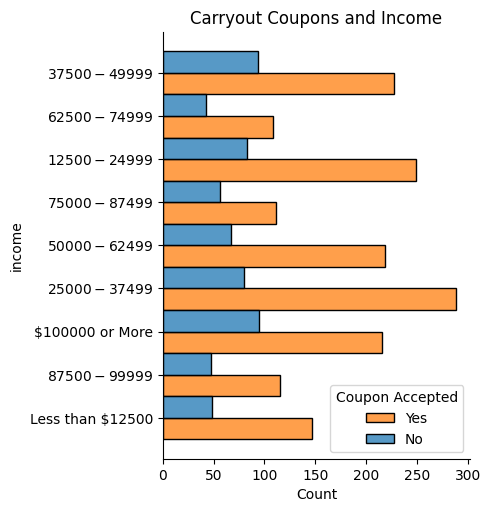

In [35]:
sns.displot(data_carryout, y = 'income', hue='Y', multiple="dodge", legend=False)
plt.legend(title='Coupon Accepted',  labels=['Yes', 'No'])
plt.title("Carryout Coupons and Income")
print("Lower income drivers were more likely to accept the coupon")

Coupon had broad appeal among drivers, ranging from never eat carryout to more than 8 times per month


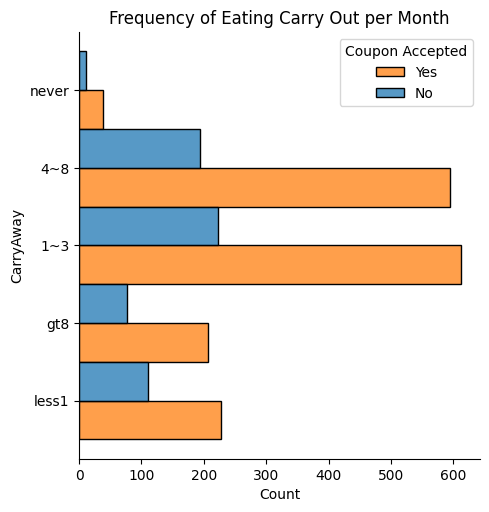

In [39]:
sns.displot(data_carryout, y = 'CarryAway', hue='Y', multiple="dodge", legend=False)
plt.legend(title='Coupon Accepted',  labels=['Yes', 'No'])
plt.title("Frequency of Eating Carry Out per Month")
print("Coupon had broad appeal among drivers, ranging from never eat carryout to more than 8 times per month")

From the Carryout coupon exploration, we can conclude that drivers interested in carry out food were generally lower income, under 30 or over 50, and equally likely to be married or single. The coupon had a broad appeal among drivers and was accepted at similar rates by those who never eat carryout to those eating carryout more than 8 times per month.


**3. Which coupon features were more likely to be accepted?**

Coupons valid for one day were more likely to be accepted than those valid for only 2 hours


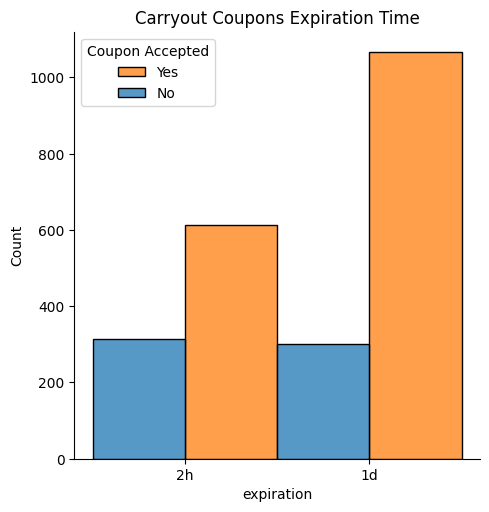

In [41]:
sns.displot(data_carryout, x = 'expiration', hue='Y', multiple="dodge", legend=False)
plt.legend(title='Coupon Accepted',  labels=['Yes', 'No'])
plt.title("Carryout Coupons Expiration Time")
print("Coupons valid for one day were more likely to be accepted than those valid for only 2 hours")

**4. Which environmental factors were more likely when coupons were accepted?**

Drivers were more likely to accept coupons on sunny days and rainy or snowy nights


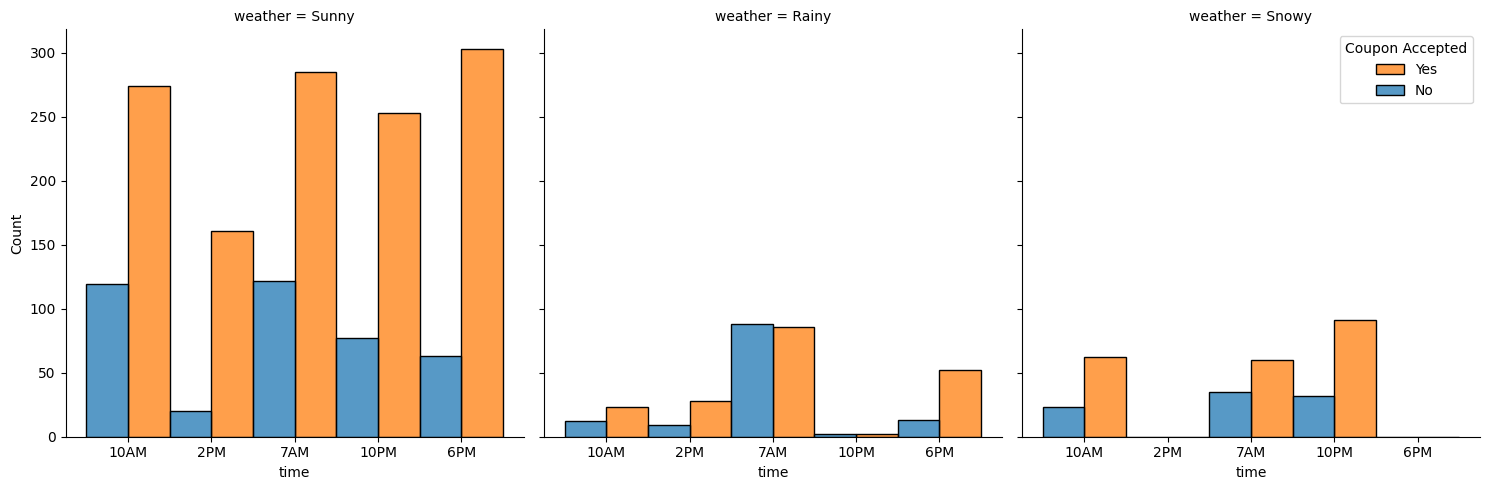

In [63]:
sns.displot(data_carryout, x='time', hue='Y', col='weather', multiple="dodge", legend=False)
plt.legend(title='Coupon Accepted', labels=['Yes', 'No'])
print("Drivers were more likely to accept coupons on sunny days and rainy or snowy nights")

**Next Steps and Recommendations**

This dataset contains a lot of data in string format, so a next step would be to convert these to numeric format for easier analysis. I only did a correlation heatmap for the overall dataset, but further analysis of correlations for each type of coupon could differentiate customer preferences.

In terms of analysis, clustering would be a good technique for customer segmentation, to quickly gain a clearer idea of customers attracted to each coupon and inform targeting future offers to them.
